# 問題7.3
> $n$変量VECモデル(7.14)，$n$変量DVECモデル(7.15)，$n$変量BEKKモデル(7.16)，$n$変量CCCモデル(7.17)，(7.18)，$n$変量DCCモデル(7.19)~(7.21)のパラメータの数を$n$の式で表せ．

In [1]:
library(rmgarch)
library(MASS)

 要求されたパッケージ rugarch をロード中です 

 要求されたパッケージ parallel をロード中です 


 次のパッケージを付け加えます: 'rugarch' 


 以下のオブジェクトは 'package:stats' からマスクされています: 

     sigma 




## $n$変量VECモデル
(7.14)は以下の通り．
$$
\mathrm{vech}(\mathbf{H}_t) = \mathbf{c} + \mathbf{B} \mathrm{vech}(\mathbf{H}_{t-1}) 
+ \mathbf{A}\mathrm{vech}(\mathbf{u}_{t-1}\mathbf{u}'_{t-1})
$$
ここで，$\mathrm{vech}$は行列の下三角行列をベクトルとして並べる作用素であり，例えば$(i, j)$成分が$h_{ij}$である$3 \times 3$行列$\mathbf{H}$に対しては
$$
\mathrm{vech}(\mathbf{H}) = (h_{11}, h_{21}, h_{31}, h_{22}, h_{23}, h_{33})
$$
となる．
つまり，$\mathbf{c}$は$n(n+1)/2 \times 1$のベクトル，$\mathbf{B}$と$\mathbf{A}$は$n(n+1)/2 \times n(n+1)/2$行列となり，
合計のパラメータ数は
$$
\frac{n(n+1)}{2} + \left( \frac{n(n+1)}{2} \right)^2 + \left( \frac{n(n+1)}{2} \right)^2
= \frac{n(n+1)}{2} + \frac{n^2(n+1)^2}{2}
$$
となる．

適当なパラメータでシミュレーションしてみる

In [2]:
set.seed(20210709)
n <- 3

# パラメータ設定
mu <- runif(n, 0.01, 0.1)
H_0 <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
cat("mu: \n")
print(mu)
cat("H_0: \n")
print(H_0)

m <- n*(n+1)/2
c <- runif(m, -0.01, 0.01)
B <- matrix(runif(m^2, 0.5, 0.7), m, m)
A <- matrix(runif(m^2, 0, 0.3), m, m)

cat("c: \n")
print(c)
cat("B: \n")
print(B)
cat("A: \n")
print(A)

mu: 
[1] 0.03290116 0.03008878 0.08236372
H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
c: 
[1] -0.001423512 -0.001220563 -0.004016685  0.001594857 -0.006169133
[6] -0.004932872
B: 
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.6904562 0.5761429 0.6060995 0.5307908 0.6854565 0.6868056
[2,] 0.5914309 0.5797851 0.6669176 0.6813972 0.6321845 0.5642827
[3,] 0.6857439 0.6380211 0.6614066 0.6589086 0.5210424 0.6696570
[4,] 0.6025173 0.5886534 0.6638044 0.5735575 0.5284444 0.6432524
[5,] 0.6821191 0.5743670 0.6583619 0.6525918 0.5636238 0.5725132
[6,] 0.6502616 0.6031700 0.5534803 0.5863352 0.6527885 0.5750896
A: 
           [,1]       [,2]       [,3]       [,4]        [,5]       [,6]
[1,] 0.13131263 0.25397666 0.09245131 0.08853796 0.250286699 0.02886510
[2,] 0.01591197 0.27765028 0.28652242 0.10860209 0.054457932 0.21214544
[3,] 0.0837

In [3]:
vech <- function(x){
    result <- c()
    for(j in 1:dim(x)[2]){
        for(i in 1:dim(x)[1]){
            if(i >= j){
                result <- c(result, x[i, j])
            }
        }
    }
    return(result)
}
vech(H_0)

[1]  0.192505813 -0.003957902  0.262033140  0.033524587 -0.042396280
[6]  0.503663022

すぐに$H$が半正定でなくなってしまう．

In [4]:
# 乱数シミュレーション
N <- 100
y <- matrix(0, N, n)
H <- H_0
for(i in 1:N){
    u <- mvrnorm(1, mu=numeric(n), Sigma=H)
    y[i, ] <- mu + u
    u_mat <- matrix(u, n, 1)
    H_vec <- matrix(c, m, 1) + B %*% matrix(vech(H), m, 1) + A %*% matrix(vech(u_mat %*% t(u_mat)), m, 1)
    k <- 1
    for(i in 1:n){
        for(j in i:n){
            H[i, j] = H_vec[k]
            H[j, i] = H_vec[k]
            k <- k+1
        }
    }
}

ERROR: Error in mvrnorm(1, mu = numeric(n), Sigma = H): 'Sigma' is not positive definite


In [5]:
print(i)
print(H_vec)
print(H)
print(eigen(H))

[1] 2
          [,1]
[1,] 0.6127555
[2,] 0.5813193
[3,] 0.6382737
[4,] 0.6233161
[5,] 0.5905431
[6,] 0.5702951
          [,1]      [,2]      [,3]
[1,] 0.6127555 0.5813193 0.6382737
[2,] 0.5813193 0.6233161 0.5905431
[3,] 0.6382737 0.5905431 0.5702951
eigen() decomposition
$values
[1]  1.80903342  0.04743323 -0.05010005

$vectors
          [,1]       [,2]       [,3]
[1,] 0.5848039  0.5265362 -0.6170608
[2,] 0.5727837 -0.8066892 -0.1455043
[3,] 0.5743895  0.2683509  0.7733463



「最初に紹介するモデルは，Bollerslev, et al. (1988)による**VECモデル**であり…」と本にあるが，Bollerslev et al. (1988)では，VECモデルを単に最も一般的な形として記載しただけで，実際にはDVECモデルを使用している．

## $n$変量DVECモデル
(7.15)は以下の通り．
$$
\mathbf{H}_t = \mathbf{C} + \mathbf{B} \odot \mathbf{H}_{t-1} 
+ \mathbf{A} \odot \left( \mathbf{u}_{t-1}\mathbf{u}'_{t-1} \right)
$$
ここで，$\odot$は行列の成分ごとの積を表すアダマール積である．
$\mathbf{A}, \mathbf{B}, \mathbf{C}$は対称行列を仮定しているので，
合計パラメータ数は
$$
3 \frac{n(n+1)}{2}
$$
となる．

In [27]:
set.seed(20210709)
n <- 3

# パラメータ設定
mu <- runif(n, 0.01, 0.1)
H_0 <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
cat("mu: \n")
print(mu)
cat("H_0: \n")
print(H_0)

C <- H_0
B <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
A <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))

cat("C: \n")
print(C)
cat("B: \n")
print(B)
cat("A: \n")
print(A)

mu: 
[1] 0.03290116 0.03008878 0.08236372
H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
C: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
B: 
            [,1]         [,2]        [,3]
[1,]  0.02254027 -0.041160640 0.022532974
[2,] -0.04116064  0.090710205 0.002939805
[3,]  0.02253297  0.002939805 0.256576686
A: 
             [,1]        [,2]         [,3]
[1,]  0.002322772 -0.01740084 -0.004814466
[2,] -0.017400837  0.22029449  0.166825766
[3,] -0.004814466  0.16682577  0.224879701


In [28]:
# 乱数シミュレーション
N <- 100
y <- matrix(0, N, n)
H <- H_0
for(i in 1:N){
    u <- mvrnorm(1, mu=numeric(n), Sigma=H)
    y[i, ] <- mu + u
    u_mat <- matrix(u, n, 1)
    H <- C + B * H + A * (u_mat %*% t(u_mat))
}

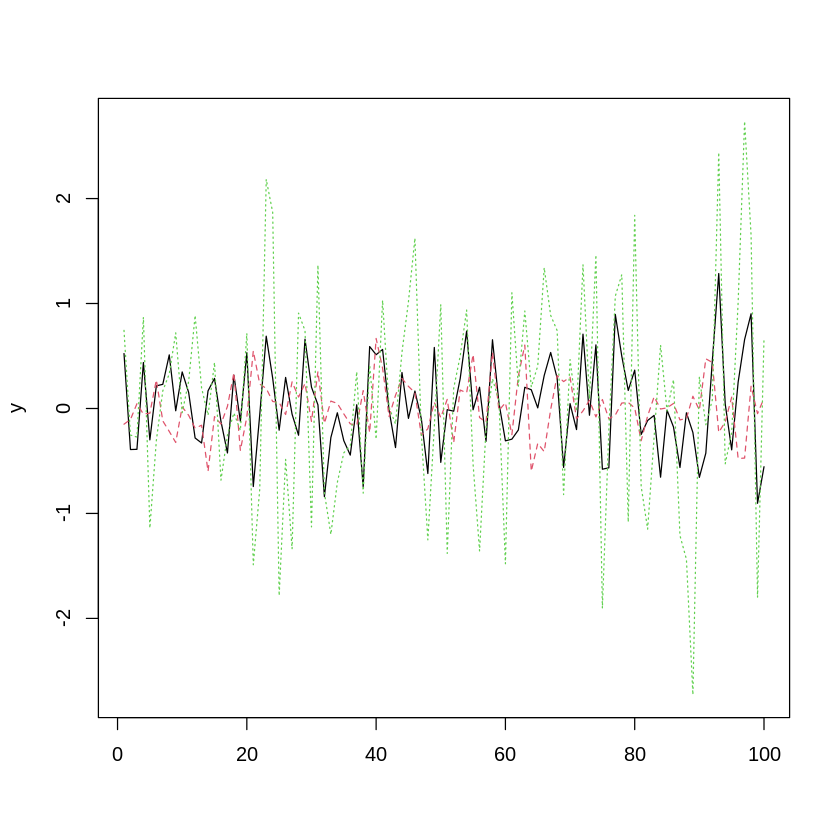

In [35]:
matplot(y, type="l")

DVECモデルを推定するパッケージがあればそれでパラメータ数を確認したかったが，見当たらなかった．$\mathbf{H}_t$の半正定性を保証しつつパラメータ推定ってどうすんの？

## $n$変量BEKKモデル
(7.16)は以下の通り．
$$
\mathbf{H}_t = \mathbf{C} + \mathbf{B} \mathbf{H}_{t-1}) \mathbf{B}'
+ \mathbf{A} \mathbf{u}_{t-1}\mathbf{u}'_{t-1} \mathbf{A}'
$$
$\mathbf{C}$は対称行列を仮定しているので，合計パラメータ数は
$$
2n^2 + \frac{n(n+1)}{2}
$$
となる．

BEKKを推定するやつはあるっぽいけど面倒なのでスキップ

# $n$変量CCCモデル
(7.17)，(7.18)は以下の通り．
$$
\mathbf{D}_t = \mathrm{diag}(h_{11, t}, ..., h_{nn, t})^\frac{1}{2}
$$
$$
\mathbf{H}_t = \mathbf{D}_t \mathbf{R} \mathbf{D}_t
$$
ここで，$\mathbf{H}_t$の対角成分$h_{11}, ..., h_{nn}$はそれぞれ1変量GARCHモデルによってモデル化されているとし，$\mathbf{R}$は時不変な相関係数である．
$\mathbf{H}_t$の対角成分がそれぞれGARCH(1, 1)でモデル化されていると，対角成分を表現するために必要なパラメータの数は$3n$となる．
相関係数のパラメータ数と合わせると，合計パラメータ数は
$$
3n + \frac{n(n-1)}{2}
$$
となる．

# $n$変量DCCモデル
(7.19)~(7.21)は以下の通り．
$$
\mathbf{H}_t = \mathbf{D}_t \mathbf{R}_t \mathbf{D}_t
$$
$$
\mathbf{R}_t = \mathrm{diag}(q_{11, t}, ..., q_{nn, t})^{-\frac{1}{2}} \mathbf{Q}_t \mathrm{diag}(q_{11, t}, ..., q_{nn, t})^{-\frac{1}{2}}
$$
$$
\mathbf{Q}_t = (1-a-b) \bar{\mathbf{Q}} + b\mathbf{Q}_{t-1} + a \varepsilon_{t-1} \varepsilon'_{t-1}
$$
ここで，$\mathbf{H}_t$の対角成分$h_{11}, ..., h_{nn}$はそれぞれ1変量GARCHモデルによってモデル化されているとし，$\mathbf{R}$は時不変な相関係数である．
$\mathbf{H}_t$の対角成分がそれぞれGARCH(1, 1)でモデル化されていると，対角成分を表現するために必要なパラメータの数は$3n$となる．
相関係数のパラメータと$a, b$を合わせると，合計パラメータ数は
$$
3n + \frac{n(n-1)}{2} + 2
$$
となる．

In [26]:
set.seed(20210709)
n <- 3

# パラメータ設定
mu <- runif(n, 0.01, 0.1)
H_0 <- cov(mvrnorm(4, mu=numeric(n), Sigma=diag(1:n)/n/5))
cat("mu: \n")
print(mu)
cat("H_0: \n")
print(H_0)

d_0 <- sqrt(diag(H_0))

c_d <- d_0
a_d <- runif(n, 0, 0.1)
b_d <- runif(n, 0, 0.1)

R_0 <- diag(1/d_0) %*% H_0 %*% diag(1/d_0)

Q_0 <- H_0
Q_bar <- Q_0

a <- 0.3
b <- 0.5

cat("d_0: \n")
print(d_0)
cat("c_d: \n")
print(c_d)
cat("a_d: \n")
print(a_d)
cat("b_d: \n")
print(b_d)

cat("R_0: \n")
print(R_0)
cat("Q_0=Q_bar=H_0: \n")
print(Q_0)

mu: 
[1] 0.03290116 0.03008878 0.08236372
H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302
d_0: 
[1] 0.4387548 0.1830972 0.7096922
c_d: 
[1] 0.4387548 0.1830972 0.7096922
a_d: 
[1] 0.04288244 0.04389719 0.02991658
b_d: 
[1] 0.05797429 0.01915434 0.02533564
R_0: 
           [,1]       [,2]       [,3]
[1,]  1.0000000 -0.0492676  0.8415197
[2,] -0.0492676  1.0000000 -0.3262691
[3,]  0.8415197 -0.3262691  1.0000000
Q_0=Q_bar=H_0: 
             [,1]         [,2]        [,3]
[1,]  0.192505813 -0.003957902  0.26203314
[2,] -0.003957902  0.033524587 -0.04239628
[3,]  0.262033140 -0.042396280  0.50366302


In [27]:
# 乱数シミュレーション
N <- 1000
y <- matrix(0, N, n)
H <- H_0
d <- d_0
Q <- Q_0
for(i in 1:N){
    u <- mvrnorm(1, mu=numeric(n), Sigma=H)
    y[i, ] <- mu + u
    
    epsilon <- matrix(u/sqrt(diag(H)), n, 1)
    d <- sqrt(c_d + a*u^2 + b*d^2)
    Q <- (1-a-b)*Q_bar + a*(epsilon %*% t(epsilon)) + b*Q
    H <- diag(d) %*% diag(1/diag(Q)) %*% Q %*% diag(1/diag(Q)) %*% diag(d)
}

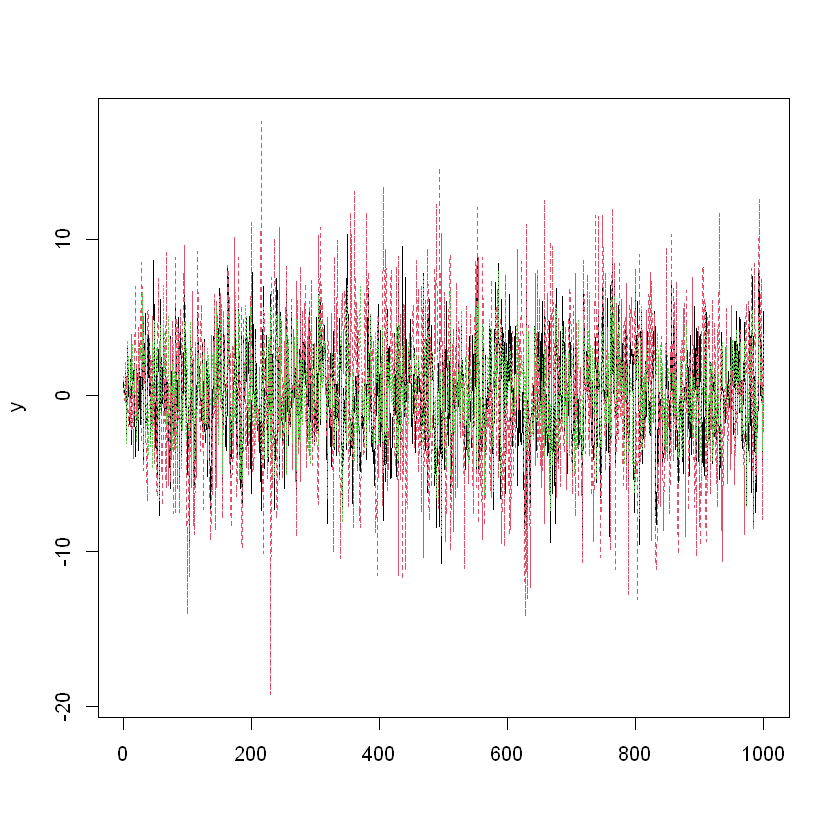

In [28]:
matplot(y, type="l")

In [29]:
mspec <- multispec(replicate(n, ugarchspec(mean.model=list(armaOrder=c(0, 0)))))
result <- dccfit(dccspec(mspec), y)

rmgarchのdccfitをやってみると，パラメータ数は17．平均の推定もパラメータに入っているので，分散共分散行列モデルのパラメータ数は17-3=14．先ほどの式に$n=3$を代入するとパラメータ数は14．推定されたパラメータ自体はあまり設定したものに近くない．

In [30]:
result


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  17
[VAR GARCH DCC UncQ] : [0+12+2+3]
No. Series           :  3
No. Obs.             :  1000
Log-Likelihood       :  -6889.269
Av.Log-Likelihood    :  -6.89 

Optimal Parameters
-----------------------------------
                  Estimate  Std. Error     t value Pr(>|t|)
[Asset_1].mu     -0.008952    0.107144   -0.083548 0.933416
[Asset_1].omega   0.050416    0.048499    1.039530 0.298558
[Asset_1].alpha1  0.000000    0.003846    0.000002 0.999999
[Asset_1].beta1   0.996006    0.000188 5311.886098 0.000000
[Asset_2].mu      0.113820    0.160280    0.710132 0.477622
[Asset_2].omega   0.132942    0.118088    1.125785 0.260256
[Asset_2].alpha1  0.000000    0.004191    0.000024 0.999981
[Asset_2].beta1   0.995226    0.000215 4620.482291 0.000000
[Asset_3].mu      0.182384    0.087891    2.07510